In [ ]:
from google.colab import files
import io
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow as tf
import plotly.express as pl
import random
import matplotlib.pyplot as plt
import seaborn as sns

Upload file

In [ ]:
uploaded = files.upload()

Saving test.json to test (1).json
Saving train.json to train (1).json


In [ ]:
uploaded_bpps = files.upload()

Saving id_000ae4237.npy to id_000ae4237.npy
Saving id_00ab2d761.npy to id_00ab2d761.npy
Saving id_00abef1d7.npy to id_00abef1d7.npy
Saving id_00b436dec.npy to id_00b436dec.npy
Saving id_00bca3932.npy to id_00bca3932.npy
Saving id_00c4348c4.npy to id_00c4348c4.npy
Saving id_00ca60e44.npy to id_00ca60e44.npy
Saving id_00cd52aa9.npy to id_00cd52aa9.npy
Saving id_00cda8e23.npy to id_00cda8e23.npy
Saving id_00dccd97d.npy to id_00dccd97d.npy
Saving id_00e33f23b.npy to id_00e33f23b.npy
Saving id_00e99b69c.npy to id_00e99b69c.npy
Saving id_00fcc5cd1.npy to id_00fcc5cd1.npy
Saving id_00ff7414e.npy to id_00ff7414e.npy
Saving id_0a2bbe37e.npy to id_0a2bbe37e.npy
Saving id_0a5ba2a51.npy to id_0a5ba2a51.npy
Saving id_0a5fc0b4d.npy to id_0a5fc0b4d.npy
Saving id_0a6ff9412.npy to id_0a6ff9412.npy
Saving id_0a7f659a1.npy to id_0a7f659a1.npy
Saving id_0a22a39dd.npy to id_0a22a39dd.npy
Saving id_0a26f0da5.npy to id_0a26f0da5.npy
Saving id_0a30b7d87.npy to id_0a30b7d87.npy
Saving id_0a42c8a30.npy to id_0a

KeyboardInterrupt: ignored

In [ ]:
pred_cols = ['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C', 'deg_pH10', 'deg_50C']

In [ ]:
input_cols = ['sequence', 'structure', 'predicted_loop_type']

In [ ]:
train = pd.read_json(io.BytesIO(uploaded['train.json']), lines=True).drop('index', axis=1)
test = pd.read_json(io.BytesIO(uploaded['test.json']), lines=True).drop('index', axis=1)

In [ ]:
train = train.query("signal_to_noise >= 1")

In [ ]:
train = train.query("SN_filter == 1")

In [ ]:
test_private = test.query("seq_length == 130")

In [ ]:
test_public = test.query("seq_length == 107")

In [ ]:
train.head()

,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
5,id_00ab2d761,GGAAAGCGCCGCGGCGGUAGCGGCAGCGAGGAGCGCUACCAAGGCA...,.....(.(((((.(((((((((...........)))))))..(((....,EEEEESISSSSSISSSSSSSSSHHHHHHHHHHHSSSSSSSMMSSSH...,4.136,1,107,68,"[0.1942, 0.2041, 0.1626, 0.1213, 0.10590000000...","[0.2726, 0.2984, 0.21660000000000001, 0.1637, ...","[0.3393, 0.2728, 0.2005, 0.1703, 0.1495, 0.134...","[0.165, 0.20520000000000002, 0.179, 0.1333, 0....","[0.2864, 0.24710000000000001, 0.2222, 0.1903, ...","[0.7642, 1.6641, 1.0622, 0.5008, 0.4107, 0.133...","[0.9559000000000001, 1.9442, 1.0114, 0.5105000...","[1.9554, 2.1298, 1.0403, 0.609, 0.5486, 0.386,...","[0.22460000000000002, 1.7281, 1.381, 0.6623, 0...","[0.5882000000000001, 1.1786, 0.9704, 0.6035, 0..."
6,id_00abef1d7,GGAAAACAAUUGCAUCGUUAGUACGACUCCACAGCGUAAGCUGUGG...,.........((((((((......((((((((((((....)))))))...,EEEEEEEEESSSSSSSSIIIIIISSSSSSSSSSSSHHHHSSSSSSS...,2.485,1,107,68,"[0.422, 0.5478000000000001, 0.4749000000000000...","[0.4801, 0.7943, 0.42160000000000003, 0.397300...","[0.9822000000000001, 1.272, 0.6940000000000001...","[0.5827, 0.7555000000000001, 0.5949, 0.4511, 0...","[0.9306000000000001, 1.0496, 0.5844, 0.7796000...","[0.895, 2.3377, 2.2305, 2.003, 1.9006, 1.0373,...","[0.46040000000000003, 3.6695, 0.78550000000000...","[2.7711, 7.365, 1.6924000000000001, 1.43840000...","[1.073, 2.8604000000000003, 1.9936, 1.0273, 1....","[2.0964, 3.3688000000000002, 0.6399, 2.1053, 1..."
7,id_00b436dec,GGAAAUCAUCGAGGACGGGUCCGUUCAGCACGCGAAAGCGUCGUGA...,.....(((((((((((..(((((((((..((((....))))..)))...,EEEEESSSSSSSSSSSIISSSSSSSSSIISSSSHHHHSSSSIISSS...,1.727,1,107,68,"[0.4843, 0.5233, 0.4554, 0.43520000000000003, ...","[0.8719, 1.0307, 0.6649, 0.34500000000000003, ...","[0.7045, 0.7775000000000001, 0.5662, 0.4561, 0...","[0.384, 0.723, 0.4766, 0.30260000000000004, 0....","[0.7429, 0.9137000000000001, 0.480400000000000...","[1.1576, 1.5137, 1.3382, 1.5622, 1.2121, 0.295...","[1.6912, 5.2652, 2.3901, 0.45890000000000003, ...","[1.8641, 2.3767, 1.149, 1.0132, 0.9876, 0.0, 0...","[0.49060000000000004, 4.6339, 1.95860000000000...","[1.2852000000000001, 2.5460000000000003, 0.234..."


In [ ]:
def preprocess_inputs(df,input_cols):
    """
    Converts inputs into one-hot
    """
    output = []
    for i in range(len(input_cols)):
        tokenizer = keras.preprocessing.text.Tokenizer(char_level=True)
        tokenizer.fit_on_texts(np.asarray(df[input_cols[i]]))
        tmp = tokenizer.texts_to_sequences(np.asarray(df[input_cols[i]]))
        new_var = np.asarray(keras.utils.to_categorical(tmp)[:,:,1:])
        if new_var.shape[1] != 130:
            longer = np.full((new_var.shape[0], 130, new_var.shape[2]), np.float32(0))
            for seq_index in range(len(new_var)):
                tmp = new_var[seq_index]
                row_len = len(tmp[0])
                new_line = np.full(row_len, -10, np.float32)
                while len(tmp) != 130:
                    tmp = np.vstack((tmp, new_line))
                longer[seq_index] = tmp
        output.append(longer)
    return output

In [ ]:
inputs = preprocess_inputs(train,input_cols)

In [ ]:
np.float32(10)

10.0

In [ ]:
inputs[0][0][60:]

array([[  0.,   0.,   0.,   1.],
       [  1.,   0.,   0.,   0.],
       [  0.,   0.,   1.,   0.],
       [  0.,   0.,   1.,   0.],
       [  1.,   0.,   0.,   0.],
       [  0.,   1.,   0.,   0.],
       [  0.,   0.,   1.,   0.],
       [  1.,   0.,   0.,   0.],
       [  0.,   1.,   0.,   0.],
       [  0.,   0.,   0.,   1.],
       [  0.,   0.,   0.,   1.],
       [  1.,   0.,   0.,   0.],
       [  0.,   1.,   0.,   0.],
       [  1.,   0.,   0.,   0.],
       [  0.,   1.,   0.,   0.],
       [  0.,   0.,   0.,   1.],
       [  0.,   0.,   0.,   1.],
       [  0.,   0.,   1.,   0.],
       [  0.,   1.,   0.,   0.],
       [  0.,   0.,   1.,   0.],
       [  0.,   0.,   0.,   1.],
       [  0.,   0.,   1.,   0.],
       [  0.,   0.,   0.,   1.],
       [  1.,   0.,   0.,   0.],
       [  1.,   0.,   0.,   0.],
       [  0.,   0.,   1.,   0.],
       [  1.,   0.,   0.,   0.],
       [  1.,   0.,   0.,   0.],
       [  1.,   0.,   0.,   0.],
       [  1.,   0.,   0.,   0.],
       [  

In [ ]:
def merge_inputs(inputs):
    """
    Merges the one-hot inputs by columns
    Also snips seq length's till desired amount
    """
    size = len(inputs[0])
    output = []
    for i in range(size):
        output.append(np.concatenate((inputs[0][i], inputs[1][i], inputs[2][i]), axis = 1))
    return np.asarray(output)

In [ ]:
inputs_simple = merge_inputs(inputs)

In [ ]:
inputs_simple.shape

(1587, 130, 14)

In [ ]:
test1 = np.zeros((2,5,5))

In [ ]:
test1[1,1,0:3]

array([0., 0., 0.])

In [ ]:
def preprocess_results(df, results):
    """
    Makes sure that the results are in the appropriate format:
        [layers,lines,columns] in an np array
    """
    tmp = np.asarray(df[results])
    size = len(tmp[0])
    output = np.zeros((len(tmp),len(tmp[0][0]),len(results)))
    for i in range(len(results)):
        for j in range(size):
            tmp[i,j] = np.asarray(tmp[i,j])
    for i in range(len(tmp)):
        output[i] = np.vstack((tmp[i,0], tmp[i,1], tmp[i,2], 
                                tmp[i,3], tmp[i,4]))[:,:].T
    if output.shape[1] != 130:
        longer = np.full((output.shape[0], 130, output.shape[2]), np.float32(0))
        for seq_index in range(output.shape[0]):
            tmp = output[seq_index]
            row_len = len(tmp[0])
            new_line = np.full(row_len, -10, np.float32)
            while len(tmp) != 130:
                tmp = np.vstack((tmp, new_line))
            longer[seq_index] = tmp
    return longer

In [ ]:
expected_results = preprocess_results(train, pred_cols)

In [ ]:
expected_results.shape

(1587, 130, 5)

In [ ]:
expected_results[0,0]

array([0.3297, 0.7556, 0.3581, 2.3375, 0.6382], dtype=float32)

In [ ]:
inputs_simple

array([[[  0.,   1.,   0., ...,   0.,   0.,   0.],
        [  0.,   1.,   0., ...,   0.,   0.,   0.],
        [  1.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [-10., -10., -10., ..., -10., -10., -10.],
        [-10., -10., -10., ..., -10., -10., -10.],
        [-10., -10., -10., ..., -10., -10., -10.]],

       [[  0.,   1.,   0., ...,   0.,   0.,   0.],
        [  0.,   1.,   0., ...,   0.,   0.,   0.],
        [  1.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [-10., -10., -10., ..., -10., -10., -10.],
        [-10., -10., -10., ..., -10., -10., -10.],
        [-10., -10., -10., ..., -10., -10., -10.]],

       [[  0.,   1.,   0., ...,   0.,   0.,   0.],
        [  0.,   1.,   0., ...,   0.,   0.,   0.],
        [  1.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [-10., -10., -10., ..., -10., -10., -10.],
        [-10., -10., -10., ..., -10., -10., -10.],
        [-10., -10., -10., ..., -10., -10., -10.]],

       ...,

       [[  0.,   1.,   0

In [ ]:
masking_func = lambda inputs, previous_mask: previous_mask
model_simple = keras.Sequential()

model_simple.add(keras.layers.Masking(mask_value=np.float32(-10), input_shape=(130,14)))
model_simple.add(keras.layers.Conv1D(filters=10, kernel_size=3, activation=('relu'), 
                                     input_shape=(130,14), padding='same'))
model_simple.add(keras.layers.GlobalMaxPooling1D())
model_simple.add(keras.layers.Dense(40, activation=('relu')))
model_simple.add(keras.layers.Dense(20, activation=('relu')))
model_simple.add(keras.layers.Dense(16, activation='relu'))
#model_simple.add(keras.layers.Dropout(rate=0.4))
model_simple.add(keras.layers.Dense(10, activation='relu'))
model_simple.add(keras.layers.Dropout(rate=0.4))


#Est-ce que le out put c'est 3 valuers distinctes, ou 1 valeurs mais qui existe dans 3 channels?
model_simple.add(keras.layers.Dense(130, activation='linear'))
model_simple.add(keras.layers.Lambda(lambda x: x[:, :], mask=masking_func))

# mean_squared_error car on a affair a une regression
model_simple.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model_simple.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_27 (Masking)         (None, 130, 14)           0         
_________________________________________________________________
conv1d_327 (Conv1D)          (None, 130, 10)           430       
_________________________________________________________________
global_max_pooling1d_47 (Glo (None, 10)                0         
_________________________________________________________________
dense_100 (Dense)            (None, 40)                440       
_________________________________________________________________
dense_101 (Dense)            (None, 20)                820       
_________________________________________________________________
dense_102 (Dense)            (None, 16)                336       
_________________________________________________________________
dense_103 (Dense)            (None, 10)              

In [ ]:
model_simple.fit(inputs_simple[:], expected_results[:,:,0], batch_size=100, 
                 epochs=500, verbose=1, validation_split=0.2) # validation loss keeps going down?

Epoch 1/500
13/13 [==============================] - 0s 12ms/step - loss: 47.8005 - mean_squared_error: 47.8005 - val_loss: 47.6532 - val_mean_squared_error: 47.6532
Epoch 2/500
13/13 [==============================] - 0s 4ms/step - loss: 47.4039 - mean_squared_error: 47.4039 - val_loss: 46.9557 - val_mean_squared_error: 46.9557
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 46.2262 - mean_squared_error: 46.2262 - val_loss: 44.8420 - val_mean_squared_error: 44.8420
Epoch 4/500
13/13 [==============================] - 0s 4ms/step - loss: 42.9067 - mean_squared_error: 42.9067 - val_loss: 39.0060 - val_mean_squared_error: 39.0060
Epoch 5/500
13/13 [==============================] - 0s 4ms/step - loss: 35.1234 - mean_squared_error: 35.1234 - val_loss: 26.2652 - val_mean_squared_error: 26.2652
Epoch 6/500
13/13 [==============================] - 0s 4ms/step - loss: 23.5430 - mean_squared_error: 23.5430 - val_loss: 11.1921 - val_mean_squared_error: 11.1921
Epoch 7/5

In [ ]:
model_simple.predict(inputs_simple)

array([[ 0.57133687,  1.6030375 ,  1.2029135 , ..., -9.430288  ,
        -9.417287  , -9.428621  ],
       [ 0.5713231 ,  1.603122  ,  1.2029462 , ..., -9.444086  ,
        -9.431428  , -9.442457  ],
       [ 0.57135564,  1.6028816 ,  1.2028183 , ..., -9.413578  ,
        -9.40016   , -9.411863  ],
       ...,
       [ 0.57133746,  1.6030042 ,  1.2029068 , ..., -9.426062  ,
        -9.412954  , -9.424383  ],
       [ 0.5713316 ,  1.603106  ,  1.2029577 , ..., -9.435845  ,
        -9.42298   , -9.434194  ],
       [ 0.57132924,  1.6031032 ,  1.2029295 , ..., -9.440855  ,
        -9.428116  , -9.439217  ]], dtype=float32)

In [ ]:
inputs_simple_test_public = preprocess_inputs(test_public,input_cols)
inputs_simple_test_public = merge_inputs(inputs_simple_test_public)

In [ ]:
inputs_simple_test_public.shape

(629, 130, 14)

In [ ]:
model_simple.predict(inputs_simple_test_public)

array([[ 0.5853468 ,  1.6085895 ,  1.2274805 , ..., -9.419113  ,
        -9.449759  , -9.477439  ],
       [ 0.5853376 ,  1.608577  ,  1.2274758 , ..., -9.417034  ,
        -9.44779   , -9.475569  ],
       [ 0.58536166,  1.6086534 ,  1.2275381 , ..., -9.432662  ,
        -9.462596  , -9.489641  ],
       ...,
       [ 0.5852838 ,  1.6084808 ,  1.2274413 , ..., -9.398587  ,
        -9.430311  , -9.458956  ],
       [ 0.5853529 ,  1.6086239 ,  1.2275096 , ..., -9.426732  ,
        -9.456978  , -9.4843025 ],
       [ 0.58529633,  1.6084738 ,  1.2274097 , ..., -9.39632   ,
        -9.4281645 , -9.456915  ]], dtype=float32)

In [ ]:
expected_results[:,:,0]

array([[ 0.3297,  1.5693,  1.1227, ...,  0.2937,  0.2362,  0.5731],
       [ 0.4482,  1.4822,  1.1819, ...,  0.6449,  0.04  ,  0.5446],
       [ 0.7642,  1.6641,  1.0622, ...,  0.1107,  0.2261,  0.3238],
       ...,
       [ 0.6957,  1.251 ,  1.3236, ..., -0.0043,  0.0521,  0.0874],
       [ 0.2891,  0.4496,  0.7165, ...,  0.8738,  0.2816,  0.554 ],
       [ 1.0102,  1.7928,  1.9228, ...,  0.0381, -0.0066,  0.0706]])

In [ ]:
expected_results[1]

array([[0.4482, 0.2504, 0.5163, 2.243 , 0.9501],
       [1.4822, 1.4021, 1.6823, 2.9361, 1.7975],
       [1.1819, 0.9804, 1.0426, 1.0553, 1.4991],
       [0.7434, 0.4967, 0.7902, 0.721 , 0.8686],
       [0.7148, 0.3653, 0.7477, 0.6396, 0.6893],
       [0.6529, 0.8973, 0.9697, 1.1473, 1.2293],
       [0.2239, 0.296 , 0.2527, 0.3768, 0.3176],
       [0.1927, 0.5758, 0.3151, 0.4777, 0.5927],
       [0.1969, 0.7249, 0.8943, 0.9614, 0.8827],
       [0.3033, 0.1514, 0.1396, 0.1522, 0.1861],
       [0.6176, 0.2885, 0.5329, 0.3904, 0.4771],
       [0.3858, 0.2239, 0.244 , 0.1389, 0.5338],
       [1.0418, 0.9248, 0.796 , 0.4465, 0.7546],
       [0.6581, 2.2196, 2.0522, 1.3107, 1.2277],
       [1.1053, 0.7686, 0.8767, 0.7178, 0.7779],
       [0.6224, 0.3331, 0.4773, 0.2121, 0.4945],
       [0.4591, 0.32  , 0.1956, 0.1804, 0.4322],
       [0.1989, 0.3516, 0.1778, 0.2019, 0.2082],
       [0.1632, 1.3419, 1.0562, 0.5721, 0.6173],
       [0.5538, 0.3321, 0.3052, 0.2512, 0.4662],
       [0.6342, 0.63

In [ ]:
seq_input = keras.layers.Input(shape=(130,4), name="seq")      #Input shape a revoir
pair_input = keras.layers.Input(shape=(130,3), name="pair")  
loop_input = keras.layers.Input(shape=(130,7), name="loop")  

seq_mask = keras.layers.Masking(mask_value=np.float32(-10), input_shape=(130,4))(seq_input)
pair_mask = keras.layers.Masking(mask_value=np.float32(-10), input_shape=(130,4))(pair_input)
loop_mask = keras.layers.Masking(mask_value=np.float32(-10), input_shape=(130,4))(loop_input)

seq_features = keras.layers.Conv1D(filters=10, kernel_size=3, activation=('relu'), 
                                     padding='same')(seq_mask)
pair_features = keras.layers.Conv1D(filters=10, kernel_size=3, activation=('relu'), 
                                     padding='same')(pair_mask)
loop_features = keras.layers.Conv1D(filters=10, kernel_size=3, activation=('relu'), 
                                     padding='same')(loop_mask)

seq_features = keras.layers.GlobalMaxPooling1D()(seq_features)
pair_features = keras.layers.GlobalMaxPooling1D()(pair_features)
loop_features = keras.layers.GlobalMaxPooling1D()(loop_features)

seq_features = keras.layers.Dense(20)(seq_features)
pair_features = keras.layers.Dense(20)(pair_features)
loop_features = keras.layers.Dense(20)(loop_features)


# Merge les features
x = keras.layers.concatenate([seq_features, pair_features, loop_features])

flat = keras.layers.Flatten()(x)

first_pred = keras.layers.Dense(130, name="reactivity")(flat) #regression pour "reactivity"
second_pred = keras.layers.Dense(130, name="deg_Mg_pH10")(flat)  #regression pour "ph"
third_pred = keras.layers.Dense(130, name="deg_Mg_50C")(flat)
fourth_pred = keras.layers.Dense(130, name="deg_pH10")(flat)
fifth_pred = keras.layers.Dense(130, name="deg_50C")(flat)


model = keras.Model(
    inputs=[seq_input, pair_input, loop_input],
    outputs=[first_pred, second_pred, third_pred, fourth_pred, fifth_pred],
)
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()

In [ ]:
def Conv_block(filter_num, inputs):
    features = keras.layers.Conv1D(filters=filter_num, kernel_size=3, activation=('relu'), 
                                     padding='same')(inputs)
    features = keras.layers.Conv1D(filters=filter_num-2, kernel_size=3, activation=('relu'), 
                                     padding='same')(features)
    features = keras.layers.Conv1D(filters=filter_num-4, kernel_size=3, activation=('relu'), 
                                     padding='same')(features)
    features = keras.layers.MaxPooling1D(pool_size = 2)(features)
    return features

In [ ]:
#masking_func = lambda inputs, previous_mask: previous_mask

opt = tf.optimizers.Adam(learning_rate=0.01) #default = 0.001

inputs = keras.layers.Input(shape=(130,14))      #Input shape a revoir

mask = keras.layers.Masking(mask_value=np.float32(-10))(inputs)
features = Conv_block(128, mask)
features = Conv_block(108, features)
features = Conv_block(88, features)
features = Conv_block(68, features)
features = Conv_block(48, features)


flat = keras.layers.GlobalMaxPooling1D()(features)



features = keras.layers.Dense(20, activation=('relu'))(flat)
features = keras.layers.Dropout(rate=0.3)(features)


first_pred = keras.layers.Dense(130, name="reactivity")(features) #regression pour "reactivity"
#first_out = keras.layers.Lambda(lambda first_pred: first_pred[:, :], mask=masking_func)(first_pred)
second_pred = keras.layers.Dense(130, name="deg_Mg_pH10")(features)  #regression pour "ph"
#second_out = keras.layers.Lambda(lambda second_pred: second_pred[:, :], mask=masking_func)(second_pred)
third_pred = keras.layers.Dense(130, name="deg_Mg_50C")(features)
#third_out = keras.layers.Lambda(lambda third_pred: third_pred[:, :], mask=masking_func)(third_pred)
fourth_pred = keras.layers.Dense(130, name="deg_pH10")(features)
#fourth_out = keras.layers.Lambda(lambda fourth_pred: fourth_pred[:, :], mask=masking_func)(fourth_pred)
fifth_pred = keras.layers.Dense(130, name="deg_50C")(features)
#fifth_out = keras.layers.Lambda(lambda fifth_pred: fifth_pred[:, :], mask=masking_func)(fifth_pred)


model = keras.Model(
    inputs=inputs,
    #outputs=[first_out, second_out, third_out, fourth_out, fifth_out],
    outputs=[first_pred, second_pred, third_pred, fourth_pred, fifth_pred],
)
model.compile(optimizer=opt, loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])
model.summary()


Model: "functional_63"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_31 (InputLayer)           [(None, 130, 14)]    0                                            
__________________________________________________________________________________________________
masking_38 (Masking)            (None, 130, 14)      0           input_31[0][0]                   
__________________________________________________________________________________________________
conv1d_478 (Conv1D)             (None, 130, 128)     5504        masking_38[0][0]                 
__________________________________________________________________________________________________
conv1d_479 (Conv1D)             (None, 130, 126)     48510       conv1d_478[0][0]                 
______________________________________________________________________________________

In [ ]:
toto = model.fit(inputs_simple,
          [expected_results[:,:,0], expected_results[:,:,1], expected_results[:,:,2],
          expected_results[:,:,3], expected_results[:,:,4]], batch_size = 100, 
          epochs = 600, verbose = 1, validation_split = 0.2)

Epoch 1/600
13/13 [==============================] - 1s 84ms/step - loss: 239.7778 - reactivity_loss: 47.8012 - deg_Mg_pH10_loss: 48.0628 - deg_Mg_50C_loss: 48.1802 - deg_pH10_loss: 47.8257 - deg_50C_loss: 47.9080 - reactivity_root_mean_squared_error: 6.9138 - deg_Mg_pH10_root_mean_squared_error: 6.9327 - deg_Mg_50C_root_mean_squared_error: 6.9412 - deg_pH10_root_mean_squared_error: 6.9156 - deg_50C_root_mean_squared_error: 6.9216 - val_loss: 4613.6133 - val_reactivity_loss: 904.1342 - val_deg_Mg_pH10_loss: 1048.3190 - val_deg_Mg_50C_loss: 861.1356 - val_deg_pH10_loss: 760.5264 - val_deg_50C_loss: 1039.4979 - val_reactivity_root_mean_squared_error: 30.0688 - val_deg_Mg_pH10_root_mean_squared_error: 32.3778 - val_deg_Mg_50C_root_mean_squared_error: 29.3451 - val_deg_pH10_root_mean_squared_error: 27.5776 - val_deg_50C_root_mean_squared_error: 32.2412
Epoch 2/600
13/13 [==============================] - 0s 16ms/step - loss: 706.0898 - reactivity_loss: 140.5288 - deg_Mg_pH10_loss: 154.0539

In [ ]:
def Conv_block(filter_num, inputs):
    features = keras.layers.Conv1D(filters=filter_num, kernel_size=3, activation=('relu'), 
                                     padding='same')(inputs)
    features = keras.layers.Conv1D(filters=filter_num-2, kernel_size=3, activation=('relu'), 
                                     padding='same')(features)
    features = keras.layers.Conv1D(filters=filter_num-4, kernel_size=3, activation=('relu'), 
                                     padding='same')(features)
    features = keras.layers.MaxPooling1D(pool_size = 2)(features)
    return features

In [ ]:
#masking_func = lambda inputs, previous_mask: previous_mask

opt = tf.optimizers.Adam(learning_rate=0.01) #default = 0.001

inputs = keras.layers.Input(shape=(130,14))      #Input shape a revoir

mask = keras.layers.Masking(mask_value=np.float32(-10))(inputs)
features = keras.layers.LSTM(5, activation='relu', return_sequences=True)(mask)
features = keras.layers.LSTM(5, activation='relu', return_sequences=True)(features)
features = keras.layers.LSTM(5, activation='relu', return_sequences=True)(features)

features = keras.layers.Flatten()(features)

features = keras.layers.Dense(20, activation=('relu'))(features)
features = keras.layers.Dropout(rate=0.3)(features)


first_pred = keras.layers.Dense(130, name="reactivity")(features) #regression pour "reactivity"
#first_out = keras.layers.Lambda(lambda first_pred: first_pred[:, :], mask=masking_func)(first_pred)
second_pred = keras.layers.Dense(130, name="deg_Mg_pH10")(features)  #regression pour "ph"
#second_out = keras.layers.Lambda(lambda second_pred: second_pred[:, :], mask=masking_func)(second_pred)
third_pred = keras.layers.Dense(130, name="deg_Mg_50C")(features)
#third_out = keras.layers.Lambda(lambda third_pred: third_pred[:, :], mask=masking_func)(third_pred)
fourth_pred = keras.layers.Dense(130, name="deg_pH10")(features)
#fourth_out = keras.layers.Lambda(lambda fourth_pred: fourth_pred[:, :], mask=masking_func)(fourth_pred)
fifth_pred = keras.layers.Dense(130, name="deg_50C")(features)
#fifth_out = keras.layers.Lambda(lambda fifth_pred: fifth_pred[:, :], mask=masking_func)(fifth_pred)


RNN = keras.Model(
    inputs=inputs,
    #outputs=[first_out, second_out, third_out, fourth_out, fifth_out],
    outputs=[first_pred, second_pred, third_pred, fourth_pred, fifth_pred],
)
RNN.compile(optimizer=opt, loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])
RNN.summary()


Model: "functional_71"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_39 (InputLayer)           [(None, 130, 14)]    0                                            
__________________________________________________________________________________________________
masking_46 (Masking)            (None, 130, 14)      0           input_39[0][0]                   
__________________________________________________________________________________________________
lstm_24 (LSTM)                  (None, 130, 5)       400         masking_46[0][0]                 
__________________________________________________________________________________________________
lstm_25 (LSTM)                  (None, 130, 5)       220         lstm_24[0][0]                    
______________________________________________________________________________________

In [ ]:
lolo = RNN.fit(inputs_simple,
          [expected_results[:,:,0], expected_results[:,:,1], expected_results[:,:,2],
          expected_results[:,:,3], expected_results[:,:,4]], batch_size = 75, 
          epochs = 600, verbose = 1, validation_split = 0.2)

Epoch 1/600
17/17 [==============================] - 13s 742ms/step - loss: 314.2037 - reactivity_loss: 60.8292 - deg_Mg_pH10_loss: 62.7582 - deg_Mg_50C_loss: 59.5397 - deg_pH10_loss: 64.4855 - deg_50C_loss: 66.5911 - reactivity_root_mean_squared_error: 7.7993 - deg_Mg_pH10_root_mean_squared_error: 7.9220 - deg_Mg_50C_root_mean_squared_error: 7.7162 - deg_pH10_root_mean_squared_error: 8.0303 - deg_50C_root_mean_squared_error: 8.1603 - val_loss: 153.5066 - val_reactivity_loss: 31.0618 - val_deg_Mg_pH10_loss: 31.5727 - val_deg_Mg_50C_loss: 30.8845 - val_deg_pH10_loss: 30.0686 - val_deg_50C_loss: 29.9191 - val_reactivity_root_mean_squared_error: 5.5733 - val_deg_Mg_pH10_root_mean_squared_error: 5.6190 - val_deg_Mg_50C_root_mean_squared_error: 5.5574 - val_deg_pH10_root_mean_squared_error: 5.4835 - val_deg_50C_root_mean_squared_error: 5.4698
Epoch 2/600
17/17 [==============================] - 12s 684ms/step - loss: 124.9807 - reactivity_loss: 24.7740 - deg_Mg_pH10_loss: 26.2018 - deg_Mg_5

In [ ]:
#Creation of function that gives train and test set indexes from a pandas dataframe
def data_sep(dataset, data_size, train_size):
    train = random.sample(range(data_size), train_size)
    test = list(range(0,data_size))
    for i in train:
        test.remove(i)
    return(train,test)

In [ ]:
train.shape

(1587, 18)

In [ ]:
inputs = inputs_simple
targets = expected_results
num_folds = 10
fold_no = 1
rmse_per_fold_reactivity = []
rmse_per_fold_deg_Mg_pH10 = []
rmse_per_fold_deg_Mg_50C = []
rmse_per_fold_deg_pH10 = []
rmse_per_fold_deg_50C = []
loss_per_fold_reactivity = []
loss_per_fold_deg_Mg_pH10 = []
loss_per_fold_deg_Mg_50C = []
loss_per_fold_deg_pH10 = []
loss_per_fold_deg_50C = []
while fold_no <= num_folds:
    kf_train_index,kf_test_index = data_sep(train,1587,1300)
    train_in = inputs[kf_train_index,]
    test_in = inputs[kf_test_index,]
    train_out = targets[kf_train_index,]
    test_out = targets[kf_test_index,]

    inputs_model = keras.layers.Input(shape=(None,14))      #Input shape a revoir

    features = Conv_block(128, inputs_model)
    features = Conv_block(108, features)
    features = Conv_block(88, features)
    features = Conv_block(68, features)
    features = Conv_block(48, features)


    flat = keras.layers.GlobalMaxPooling1D()(features)
    
    features = keras.layers.Dense(20)(flat)
    features = keras.layers.Dropout(rate=0.3)(features)

    first_pred = keras.layers.Dense(68, name="reactivity")(features) #regression pour "reactivity"
    second_pred = keras.layers.Dense(68, name="deg_Mg_pH10")(features)  #regression pour "ph"
    third_pred = keras.layers.Dense(68, name="deg_Mg_50C")(features)
    fourth_pred = keras.layers.Dense(68, name="deg_pH10")(features)
    fifth_pred = keras.layers.Dense(68, name="deg_50C")(features)

    model = keras.Model(
        inputs=inputs_model,
        outputs=[first_pred, second_pred, third_pred, fourth_pred, fifth_pred],
    )
    model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])
    
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    # Fit data to model
    history = model.fit(train_in, [train_out[:,:,0], train_out[:,:,1], train_out[:,:,2],
                        train_out[:,:,3], train_out[:,:,4]], batch_size=100, epochs=30, verbose=1)
    
    # Generate generalization metrics
    scores = model.evaluate(test_in, [test_out[:,:,0], test_out[:,:,1], test_out[:,:,2],
                        test_out[:,:,3], test_out[:,:,4]], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]}; {model.metrics_names[2]} of {scores[2]}; {model.metrics_names[3]} of {scores[3]}; {model.metrics_names[4]} of {scores[4]}; {model.metrics_names[5]} of {scores[5]}')
    print(f'Score for fold {fold_no}: {model.metrics_names[6]} of {scores[6]}; {model.metrics_names[7]} of {scores[7]}; {model.metrics_names[8]} of {scores[8]}; {model.metrics_names[9]} of {scores[9]}; {model.metrics_names[10]} of {scores[10]};')
    rmse_per_fold_reactivity.append(scores[6])
    rmse_per_fold_deg_Mg_pH10.append(scores[7])
    rmse_per_fold_deg_Mg_50C.append(scores[8])
    rmse_per_fold_deg_pH10.append(scores[9])
    rmse_per_fold_deg_50C.append(scores[10])
    loss_per_fold_reactivity.append(scores[1])
    loss_per_fold_deg_Mg_pH10.append(scores[2])
    loss_per_fold_deg_Mg_50C.append(scores[3])
    loss_per_fold_deg_pH10.append(scores[4])
    loss_per_fold_deg_50C.append(scores[5])
    
    fold_no+=1

In [ ]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(loss_per_fold_reactivity)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1}')
    print(f'Reactivity:  Loss = {loss_per_fold_reactivity[i]}, RMSE = {rmse_per_fold_reactivity[i]}')
    print(f'Deg_Mg_pH10:  Loss = {loss_per_fold_deg_Mg_pH10[i]}, RMSE = {rmse_per_fold_deg_Mg_pH10[i]}')
    print(f'Deg_Mg_50C:  Loss = {loss_per_fold_deg_Mg_50C[i]}, RMSE = {rmse_per_fold_deg_Mg_50C[i]}')
    print(f'Deg_pH10:  Loss = {loss_per_fold_deg_pH10[i]}, RMSE = {rmse_per_fold_deg_pH10[i]}')
    print(f'Deg_50C:  Loss = {loss_per_fold_deg_50C[i]}, RMSE = {rmse_per_fold_deg_50C[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Reactivity RMSE: {np.mean(rmse_per_fold_reactivity)} (+- {np.std(rmse_per_fold_reactivity)})')
print(f'> Deg_Mg_pH10 RMSE: {np.mean(rmse_per_fold_deg_Mg_pH10)} (+- {np.std(rmse_per_fold_deg_Mg_pH10)})')
print(f'> Deg_Mg_50C RMSE: {np.mean(rmse_per_fold_deg_Mg_50C)} (+- {np.std(rmse_per_fold_deg_Mg_50C)})')
print(f'> Deg_pH10 RMSE: {np.mean(rmse_per_fold_deg_pH10)} (+- {np.std(rmse_per_fold_deg_pH10)})')
print(f'> Deg_50C RMSE: {np.mean(rmse_per_fold_deg_50C)} (+- {np.std(rmse_per_fold_deg_50C)})')
print(f'> Reactivity loss: {np.mean(loss_per_fold_reactivity)} (+- {np.std(loss_per_fold_reactivity)})')
print(f'> Deg_Mg_pH10 loss: {np.mean(loss_per_fold_deg_Mg_pH10)} (+- {np.std(loss_per_fold_deg_Mg_pH10)})')
print(f'> Deg_Mg_50C loss: {np.mean(loss_per_fold_deg_Mg_50C)} (+- {np.std(loss_per_fold_deg_Mg_50C)})')
print(f'> Deg_pH10 loss: {np.mean(loss_per_fold_deg_pH10)} (+- {np.std(loss_per_fold_deg_pH10)})')
print(f'> Deg_50C loss: {np.mean(loss_per_fold_deg_50C)} (+- {np.std(loss_per_fold_deg_50C)})')
print('------------------------------------------------------------------------')

In [ ]:
predicted = model.predict(inputs_simple)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



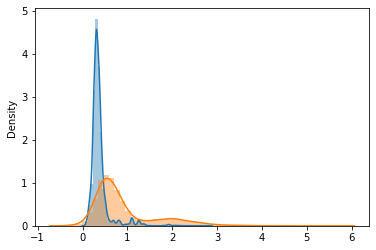

In [ ]:
sns.distplot(predicted[0])
sns.distplot(expected_results[:,0])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



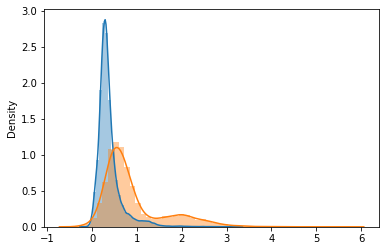

In [ ]:
sns.distplot(predicted[0])
sns.distplot(expected_results[:,0])
plt.show()

In [ ]:
predicted[0][0][60:]

array([  0.24800235,   0.24135725,   0.22886834,   0.24970698,
         0.26018754,   0.3391657 ,   0.34872374,   0.29534715,
       -10.000004  , -10.000002  , -10.000004  , -10.000003  ,
       -10.000002  , -10.000001  , -10.000014  , -10.000008  ,
       -10.000004  , -10.000003  , -10.000004  , -10.000005  ,
       -10.000003  , -10.000004  , -10.000004  , -10.000005  ,
       -10.000004  , -10.000003  , -10.000002  , -10.000002  ,
       -10.000003  , -10.000003  , -10.000004  , -10.000004  ,
       -10.000003  , -10.000002  , -10.000003  , -10.000004  ,
       -10.000003  , -10.000003  , -10.000003  , -10.000003  ,
       -10.000002  , -10.000003  , -10.000003  , -10.000003  ,
       -10.000004  , -10.000002  , -10.000003  , -10.000003  ,
       -10.000004  , -10.000004  , -10.000002  , -10.000003  ,
       -10.000003  , -10.000002  , -10.000004  , -10.000002  ,
       -10.000003  , -10.000003  , -10.000009  , -10.000003  ,
       -10.000004  , -10.000003  , -10.000004  , -10.00

In [ ]:
print(expected_results[:,:,0])

[[  0.3297   1.5693   1.1227 ... -10.     -10.     -10.    ]
 [  0.4482   1.4822   1.1819 ... -10.     -10.     -10.    ]
 [  0.7642   1.6641   1.0622 ... -10.     -10.     -10.    ]
 ...
 [  0.6957   1.251    1.3236 ... -10.     -10.     -10.    ]
 [  0.2891   0.4496   0.7165 ... -10.     -10.     -10.    ]
 [  1.0102   1.7928   1.9228 ... -10.     -10.     -10.    ]]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



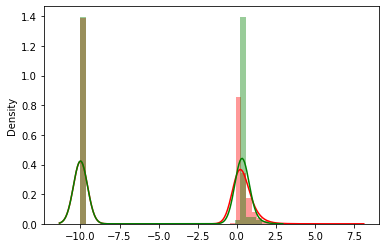

In [ ]:
sns.distplot(expected_results[:,:,0], color='red')
sns.distplot(predicted[0], color='green')
plt.show()

/home/sdv/m2bi/aroubert/.conda/envs/KERAS/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


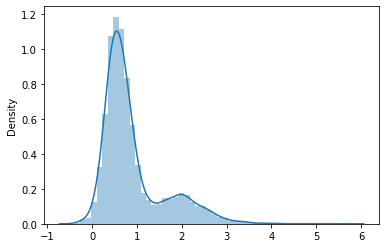

In [ ]:
sns.distplot(expected_results[:,0])
plt.show()

In [ ]:
fig = pl.line(toto.history, y = ['loss', 'val_loss'], labels={'index':'epoch', 'value':'mse'})
fig.show()

**Revoir donnees a predire**

Prendre en compte bpps (mat 2d), fournir a dense (1 branche seq 1d, 1 branche bpps 2d, concatene a la fin)